In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Adding the magic command for matplotlib
%matplotlib inline

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bc56c62aad1e6bea8df90e13a075da9


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Inserting try and except blocks to allow code to run smoothly
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | xining
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | blagoveshchensk
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | pyaozerskiy
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | los llanos de aridane
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | monte plata
Processing Record 14 of Set 1 | noumea
Processing Record 15 of Set 1 | yepocapa
Processing Record 16 of Set 1 | saucillo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | zonguldak
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | road town
Processing Record

Processing Record 39 of Set 4 | kayes
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | rawlins
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | salinopolis
Processing Record 47 of Set 4 | soyo
Processing Record 48 of Set 4 | columbus
Processing Record 49 of Set 4 | bluff
Processing Record 50 of Set 4 | beringovskiy
Processing Record 1 of Set 5 | akcakoca
Processing Record 2 of Set 5 | vardo
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | dharchula
Processing Record 5 of Set 5 | prainha
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | casino
Processing Record 8 of Set 5 | ozernovskiy
Processing Record 9 of Set 5 | mocorito
Processing Record 10 of Set 5 | kapit
Processing Record 11 of Set 5 | whitley bay
Processing Record 12 of Set 5 | n

Processing Record 28 of Set 8 | platanos
Processing Record 29 of Set 8 | laramie
Processing Record 30 of Set 8 | wahran
City not found. Skipping...
Processing Record 31 of Set 8 | longlac
City not found. Skipping...
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | governador dix-sept rosado
Processing Record 34 of Set 8 | hall
Processing Record 35 of Set 8 | eatonton
Processing Record 36 of Set 8 | biloela
Processing Record 37 of Set 8 | baripada
Processing Record 38 of Set 8 | grand-lahou
Processing Record 39 of Set 8 | ballina
Processing Record 40 of Set 8 | garbolovo
Processing Record 41 of Set 8 | lata
Processing Record 42 of Set 8 | ulladulla
Processing Record 43 of Set 8 | kankon
Processing Record 44 of Set 8 | loikaw
Processing Record 45 of Set 8 | queimadas
Processing Record 46 of Set 8 | antsohihy
Processing Record 47 of Set 8 | prince george
Processing Record 48 of Set 8 | diego de almagro
Processing Record 49 of Set 8 | lavrentiya
Processing Record 50 o

Processing Record 17 of Set 12 | tibiri
Processing Record 18 of Set 12 | hailar
Processing Record 19 of Set 12 | grand centre
City not found. Skipping...
Processing Record 20 of Set 12 | anloga
Processing Record 21 of Set 12 | lincoln
Processing Record 22 of Set 12 | batticaloa
Processing Record 23 of Set 12 | gornyy
Processing Record 24 of Set 12 | kismayo
Processing Record 25 of Set 12 | chulman
Processing Record 26 of Set 12 | pringsewu
Processing Record 27 of Set 12 | pahrump
Processing Record 28 of Set 12 | chute-aux-outardes
Processing Record 29 of Set 12 | puerto del rosario
Processing Record 30 of Set 12 | nuuk
Processing Record 31 of Set 12 | flin flon
Processing Record 32 of Set 12 | okmulgee
Processing Record 33 of Set 12 | chipinge
Processing Record 34 of Set 12 | nouadhibou
Processing Record 35 of Set 12 | pasni
Processing Record 36 of Set 12 | morondava
Processing Record 37 of Set 12 | saint-augustin
Processing Record 38 of Set 12 | garowe
Processing Record 39 of Set 12 |

In [9]:
# Getting the total number of cities with data retrived.
len(city_data)

576

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.04,54,0,9.69,AU,2021-10-14 02:12:58
1,Punta Arenas,-53.1500,-70.9167,37.11,75,51,13.80,CL,2021-10-14 02:12:59
2,Mataura,-46.1927,168.8643,52.79,53,100,6.04,NZ,2021-10-14 02:12:59
3,Xining,36.6167,101.7667,34.61,92,100,2.01,CN,2021-10-14 02:13:00
4,Puerto Ayora,-0.7393,-90.3518,68.02,80,17,8.90,EC,2021-10-14 02:13:00
5,Blagoveshchensk,50.2667,127.5333,37.09,57,94,20.13,RU,2021-10-14 02:13:01
6,Cape Town,-33.9258,18.4232,61.88,86,85,8.01,ZA,2021-10-14 02:09:05
7,Bengkulu,-3.8004,102.2655,77.31,87,100,2.42,ID,2021-10-14 02:13:02
8,Pyaozerskiy,65.8333,31.1667,33.10,89,35,5.86,RU,2021-10-14 02:13:03
9,Saskylakh,71.9167,114.0833,6.39,96,96,4.09,RU,2021-10-14 02:13:03


In [11]:
# Rearranging column order for readability
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-10-14 02:12:58,-33.6500,115.3333,59.04,54,0,9.69
1,Punta Arenas,CL,2021-10-14 02:12:59,-53.1500,-70.9167,37.11,75,51,13.80
2,Mataura,NZ,2021-10-14 02:12:59,-46.1927,168.8643,52.79,53,100,6.04
3,Xining,CN,2021-10-14 02:13:00,36.6167,101.7667,34.61,92,100,2.01
4,Puerto Ayora,EC,2021-10-14 02:13:00,-0.7393,-90.3518,68.02,80,17,8.90
5,Blagoveshchensk,RU,2021-10-14 02:13:01,50.2667,127.5333,37.09,57,94,20.13
6,Cape Town,ZA,2021-10-14 02:09:05,-33.9258,18.4232,61.88,86,85,8.01
7,Bengkulu,ID,2021-10-14 02:13:02,-3.8004,102.2655,77.31,87,100,2.42
8,Pyaozerskiy,RU,2021-10-14 02:13:03,65.8333,31.1667,33.10,89,35,5.86
9,Saskylakh,RU,2021-10-14 02:13:03,71.9167,114.0833,6.39,96,96,4.09


In [12]:
# First create the folder in the correct place for the csv file to be stored in.
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

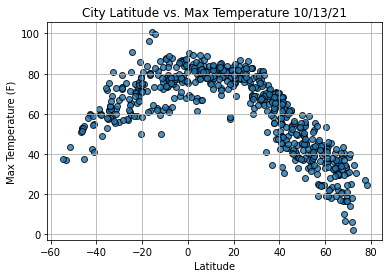

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

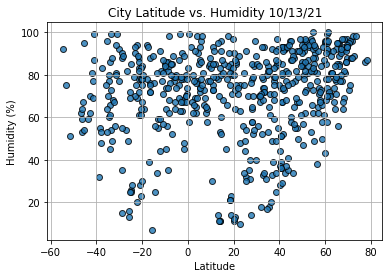

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

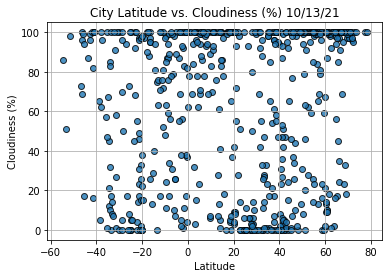

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

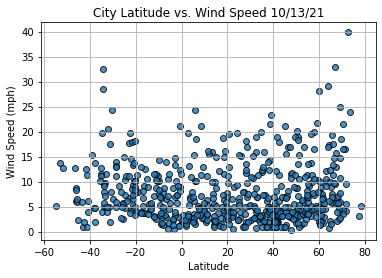

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()